In [1]:
library(data.table)
library(ggplot2)
library(reshape2)



Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt



In [21]:
dir='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
out='atac.enrichment.pdf'

cts=c('Th', 'Tc', 'B', 'cM', 'ncM', 'NK', 'MK', 'cDC', 'PBMC')

all.df=NULL
for(c in cts){
    res=fread(file=paste(dir, c, '.atac.intersectdelta.MW.enrichment.txt', sep=''))
    all.df=rbind(all.df, data.frame(res, ct=c))
    
}



all.df$pval_sig='.'
all.df$pval_sig[all.df$pval < 0.01]='*'
all.df$pval_sig[all.df$pval < 0.001]='**'
all.df$pval_sig[all.df$pval < 0.0001]='***'


all.df.use=all.df[all.df$ct!='MK', ]
all.df.use$pair=paste(all.df.use$group, all.df.use$ct)
print(head(all.df.use))

all.df.use$logp=-log10(all.df.use$pval)

#mat=dcast(all.df.use, group ~ ct, value.var = 'OR')

mat=dcast(all.df.use, group ~ ct, value.var = 'logp')
rownames(mat)=mat$group

# #normalize by row
mat=mat[, -1]
col_names=colnames(mat)
print(mat)
mat <- t(apply(mat, 1, function(x){scale(x)}))
colnames(mat)=col_names
df.use=melt(mat)

df.use$pair=paste(df.use$Var1, df.use$Var2)
df.use$pval_sig=all.df.use$pval_sig[match(df.use$pair, all.df.use$pair)]


print(head(df.use))

# print(unique(df.use$Var1))
# print(unique(df.use$Var2))

# #  [1] B_resting          B_stimulated       B&T_stimulated     EPI_resting       
# #  [5] myeloid_resting    nk_resting         open               progenitor_resting
# #  [9] T_resting          T_stimulated       thymo_resting    


order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'EPI_resting', 'progenitor_resting', 'thymo_resting', 'myeloid_resting', 'open')
order_var2=c('B', 'Th', 'Tc', 'NK', 'cM', 'ncM', 'cDC', 'PBMC', 'ct.combined')
df.use$Var1=factor(df.use$Var1, levels=order_var1)
df.use$Var2=factor(df.use$Var2, levels=order_var2)

df.use=df.use[-which(df.use$Var1 %in% c('EPI_resting', 'progenitor_resting')), ]



           W      pval           group ct pval_sig               pair
1 4543161577 0.1046997       B_resting Th        .       B_resting Th
2 1204533017 1.0000000    B_stimulated Th        .    B_stimulated Th
3 2696176454 1.0000000  B&T_stimulated Th        .  B&T_stimulated Th
4 7471954644 1.0000000     EPI_resting Th        .     EPI_resting Th
5 4663932310 1.0000000 myeloid_resting Th        . myeloid_resting Th
6 3396897854 0.3540267      nk_resting Th        .      nk_resting Th
                             Th           Tc            B           cM
B_resting          9.800546e-01 4.700953e-01 9.487777e+00 1.855825e+00
B_stimulated       1.834269e-09 2.133380e-10 2.429975e-05 1.997888e-06
B&T_stimulated     1.369743e-10 2.039553e-14 5.385459e-05 1.955572e-10
EPI_resting        0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
myeloid_resting    1.748297e-11 3.267228e-10 4.766780e-08 2.256429e+00
nk_resting         4.509640e-01 2.310686e+00 7.123404e-01 4.114254e-02
open         

In [30]:
options(repr.plot.width=8, repr.plot.height=5)


pdf('figures/atac.MW.enrichment.heatmap.pdf', useDingbats = F, width =8 , height=5)
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)
print(plt)
dev.off()



png 
  2

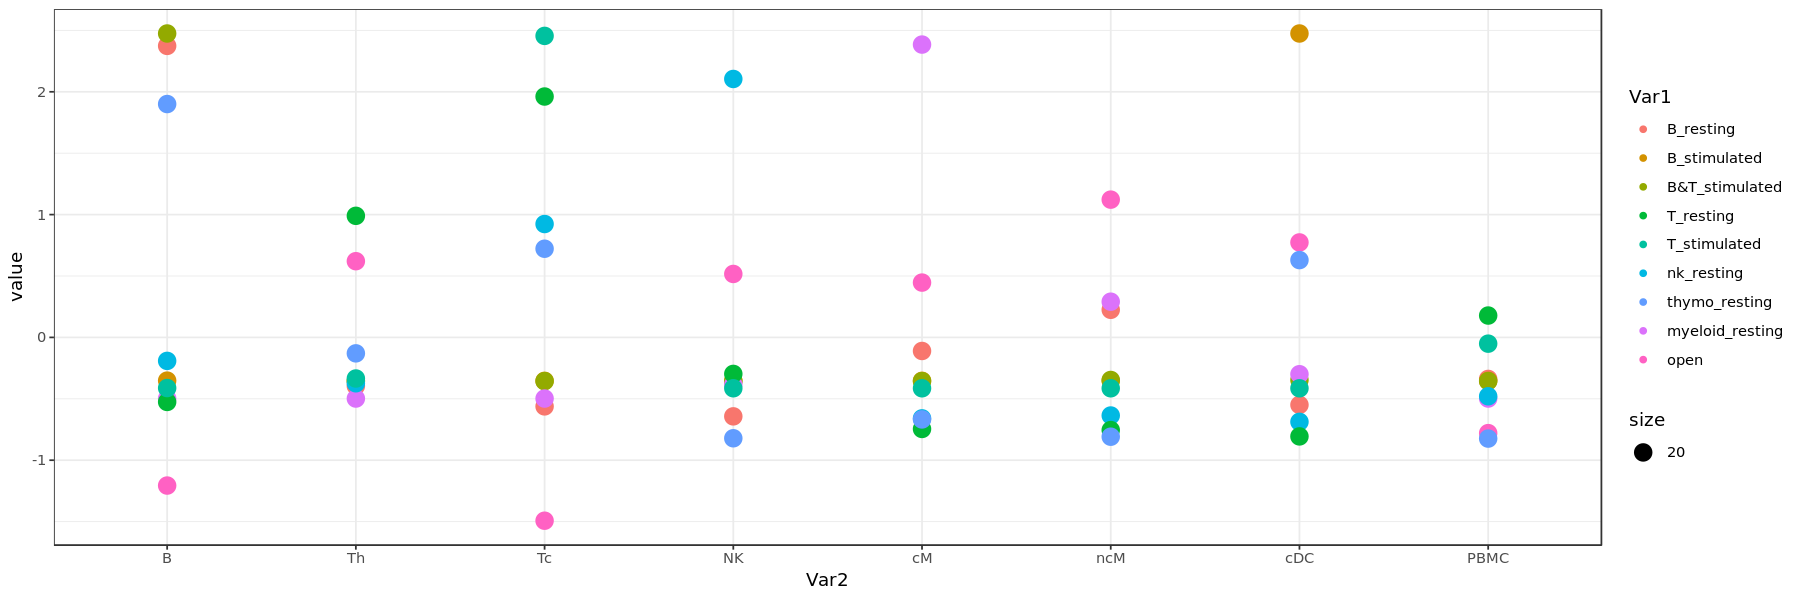

In [28]:
ggplot(df.use,aes(x=Var2, y=value, color=Var1, size=20)) + geom_point() + theme_bw()